# Universidad de O'Higgins

## Escuela de Ingeniería
## COM4402: Introducción a Inteligencia Artificial

### **Tarea 2: Clasificación de Dígitos Manuscritos con Redes Neuronales**

### Estudiante: Daniela Salinas Castro

El objetivo de esta tarea es utilizar redes neuronales en un problema de clasificación de dígitos. Se utilizará el conjunto de datos Optical Recognition of Handwritten Digits Data Set. Este conjunto tiene 64 características, con 10 clases y 5620 muestras en total. La base de datos estará disponible en U-Campus.

Las redes a ser entrenadas tienen la siguiente estructura: capa de entrada de dimensionalidad 64 (correspondiente a los datos de entrada), capas ocultas (una o dos) y capa de salida con 10 neuronas y función de activación softmax. La función de loss (pérdida) es entropía cruzada. El optimizador que se
debe usar es Adam. La función softmax está implícita al usar la función de pérdida CrossEntropyLoss de PyTorch (**no se debe agregar softmax a la salida de la red**).

Se usará PyTorch para entrenar y validar la red neuronal que implementa el clasificador de dígitos. Se analizará los efectos de cambiar el tamaño de la red (número de capas ocultas y de neuronas en estas
capas) y la función de activación.

El siguiente código base debe ser usado para realizar las actividades pedidas.

## Observación: Antes de ejecutar su código, active el uso de GPU en Google Colab para acelerar el proceso de entrenamiento.

### Para esto: vaya a "Entorno de Ejecución" en el menú superior, haga click en "Cambiar tipo de entorno de ejecución", y seleccionar/verificar "GPU" en "Acelerador de Hardware"

## Improtamos las librerías

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

## Subir datasets de dígitos

In [2]:
!wget https://github.com/tiffahana/databaseintrotoaihomework2/raw/main/1_digits_train.txt
!wget https://github.com/tiffahana/databaseintrotoaihomework2/raw/main/1_digits_test.txt

--2023-10-28 22:11:16--  https://github.com/tiffahana/databaseintrotoaihomework2/raw/main/1_digits_train.txt
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tiffahana/databaseintrotoaihomework2/main/1_digits_train.txt [following]
--2023-10-28 22:11:16--  https://raw.githubusercontent.com/tiffahana/databaseintrotoaihomework2/main/1_digits_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 640604 (626K) [text/plain]
Saving to: ‘1_digits_train.txt.3’

1_digits_train.txt. 100%[===================>] 625.59K  --.-KB/s    in 0.04s   

2023-10-28 22:11:16 (14.5 MB/s) - ‘1_digits_train.txt.3’ save

## Leer dataset de dígitos

In [3]:
column_names = ["feat" + str(i) for i in range(64)]
column_names.append("class")

In [4]:
df_train_val = pd.read_csv('1_digits_train.txt', names = column_names)
df_train_val

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat55,feat56,feat57,feat58,feat59,feat60,feat61,feat62,feat63,class
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4342,0,0,9,11,0,0,0,0,0,7,...,0,0,0,8,12,12,15,10,0,2
4343,0,0,6,15,2,0,0,0,0,0,...,0,0,0,7,16,16,10,1,0,6
4344,0,0,15,16,16,14,0,0,0,0,...,0,0,0,14,11,0,0,0,0,7
4345,0,0,0,1,15,11,0,0,0,0,...,0,0,0,0,1,16,10,0,0,4


In [5]:
df_test = pd.read_csv('1_digits_test.txt', names = column_names)
df_test

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat55,feat56,feat57,feat58,feat59,feat60,feat61,feat62,feat63,class
0,0,0,13,12,10,12,8,0,0,2,...,0,0,0,10,16,16,8,0,0,5
1,0,0,8,16,14,4,0,0,0,5,...,0,0,0,10,16,14,12,2,0,9
2,0,0,0,7,16,0,0,0,0,0,...,0,0,0,0,9,15,1,0,0,4
3,0,0,2,14,9,2,0,0,0,0,...,0,0,0,2,14,14,2,0,0,0
4,0,1,16,16,15,3,0,0,0,0,...,0,0,0,16,6,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,0,0,5,13,11,2,0,0,0,2,...,0,0,0,8,13,15,10,1,0,9
1268,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,4,9,0,0,0,4
1269,0,0,3,15,0,0,0,0,0,0,...,0,0,0,4,14,16,9,0,0,6
1270,0,0,6,16,2,0,0,0,0,0,...,0,0,0,5,16,16,16,5,0,6


In [6]:
df_train, df_val = train_test_split(df_train_val, test_size = 0.3, random_state = 10)

In [7]:
scaler = StandardScaler().fit(df_train.iloc[:,0:64])
df_train.iloc[:,0:64] = scaler.transform(df_train.iloc[:,0:64])
df_val.iloc[:,0:64] = scaler.transform(df_val.iloc[:,0:64])
df_test.iloc[:,0:64] = scaler.transform(df_test.iloc[:,0:64])

<ipython-input-7-9f48500b620a>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_train.iloc[:,0:64] = scaler.transform(df_train.iloc[:,0:64])
<ipython-input-7-9f48500b620a>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_val.iloc[:,0:64] = scaler.transform(df_val.iloc[:,0:64])
<ipython-input-7-9f48500b620a>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns

In [8]:
df_train

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat55,feat56,feat57,feat58,feat59,feat60,feat61,feat62,feat63,class
4026,0.0,-0.338570,0.797238,0.535297,-0.599203,-1.007598,-0.412556,-0.13043,-0.045374,1.329217,...,-0.206188,0.0,-0.302452,0.078492,-0.427291,0.468026,1.548367,0.696964,-0.186744,9
1548,0.0,-0.338570,-0.269346,0.999221,0.985819,0.594099,-0.412556,-0.13043,-0.045374,-0.619760,...,-0.206188,0.0,-0.302452,-0.121990,0.248408,0.876852,1.378118,-0.527715,-0.186744,3
1709,0.0,-0.338570,-0.482663,0.535297,0.759387,0.594099,-0.412556,-0.13043,-0.045374,-0.619760,...,-0.206188,0.0,-0.302452,-0.723436,-0.427291,0.876852,1.548367,-0.037843,-0.186744,1
2195,0.0,2.026364,1.863823,-0.392551,-2.410657,-1.007598,-0.412556,-0.13043,-0.045374,1.329217,...,-0.206188,0.0,1.890776,1.481867,-0.652523,-0.758451,0.356618,1.186836,-0.186744,2
1216,0.0,2.026364,0.797238,0.767259,0.985819,1.661897,0.191388,-0.13043,-0.045374,2.953365,...,-0.206188,0.0,-0.302452,1.281385,0.924106,0.672439,0.356618,-0.282779,-0.186744,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,0.0,-0.338570,-1.122613,-2.248248,-0.599203,1.839863,0.493359,-0.13043,-0.045374,-0.619760,...,-0.206188,0.0,-0.302452,-1.124400,-2.679617,0.468026,-0.664881,-0.527715,-0.186744,9
1180,0.0,0.843897,0.583922,-0.392551,0.532956,0.772065,-0.412556,-0.13043,-0.045374,3.278195,...,-0.206188,0.0,-0.302452,1.281385,0.924106,0.468026,0.867368,0.452028,-0.186744,3
3441,0.0,-0.338570,-0.269346,-0.160589,0.985819,0.950031,-0.110584,-0.13043,-0.045374,0.354728,...,-0.206188,0.0,-0.302452,0.078492,0.473640,-2.393755,-1.175631,-0.527715,-0.186744,9
1344,0.0,-0.338570,1.223872,0.999221,0.985819,0.238166,-0.412556,-0.13043,-0.045374,0.029899,...,0.911859,0.0,-0.302452,0.880421,0.924106,0.876852,1.548367,3.391260,6.008192,2


## Crear datasets y dataloaders para pytorch

In [9]:
# Crear datasets
feats_train = df_train.to_numpy()[:,0:64].astype(np.float32)
labels_train = df_train.to_numpy()[:,64].astype(int)
dataset_train = [ {"features":feats_train[i,:], "labels":labels_train[i]} for i in range(feats_train.shape[0]) ]

feats_val = df_val.to_numpy()[:,0:64].astype(np.float32)
labels_val = df_val.to_numpy()[:,64].astype(int)
dataset_val = [ {"features":feats_val[i,:], "labels":labels_val[i]} for i in range(feats_val.shape[0]) ]

feats_test = df_test.to_numpy()[:,0:64].astype(np.float32)
labels_test = df_test.to_numpy()[:,64].astype(int)
dataset_test = [ {"features":feats_test[i,:], "labels":labels_test[i]} for i in range(feats_test.shape[0]) ]

In [10]:
# Crear dataloaders
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=128, shuffle=True, num_workers=0)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=128, shuffle=True, num_workers=0)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=128, shuffle=True, num_workers=0)

# **Modelo 10 neuronas ReLU y 1000 épocas**

In [11]:
model = nn.Sequential( #Creamos la red neuronal
          nn.Linear(64, 10),
          nn.ReLU(),
          nn.Linear(10, 10)
        )

In [12]:
device = torch.device('cuda') #Pasamos a GPU

model = model.to(device) #El modelo se pasa a GPU

criterion = nn.CrossEntropyLoss() #Control de perdida
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3) #Control de optimizacion

## Entrenamiento

In [13]:
start = time.time() #Variable para guardar el comienzo del tiempo de ejecucion
p = 30 #Establece un valor para evitar el overfitting
best_validation_loss = float('inf') #Guardamos la mejor perdida del conjunto de validacion
epochs_without_improvement = 0 #Guardamos las epocas sin mejora de la perdida del conjunto de validacion

# Guardar resultados del loss y epocas que duró el entrenamiento
loss_train = []
loss_val = []
epochs = []

# Entrenamiento de la red por n epocas
for epoch in range(1000):
  # Guardar loss de cada batch
  loss_train_batches = []
  loss_val_batches = []

  # Entrenamiento --------------------------------------------------------------
  model.train()
  # Debemos recorrer cada batch (lote de los datos)
  for i, data in enumerate(dataloader_train, 0):
    # Procesar batch actual
    inputs = data["features"].to(device) # Características
    labels = data["labels"].to(device)   # Clases
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = model(inputs)           # Predicciones
    loss = criterion(outputs, labels) # Loss de entrenamiento
    loss.backward()                   # Backpropagation
    optimizer.step()

    # Guardamos la pérdida de entrenamiento en el batch actual
    loss_train_batches.append(loss.item())

  # Guardamos el loss de entrenamiento de la época actual
  loss_train.append(np.mean(loss_train_batches)) # Loss promedio de los batches

  # Predicción en conjunto de validación ---------------------------------------
  model.eval()
  with torch.no_grad():
    # Iteramos dataloader_val para evaluar el modelo en los datos de validación
    for i, data in enumerate(dataloader_val, 0):
      # Procesar batch actual
      inputs = data["features"].to(device) # Características
      labels = data["labels"].to(device)   # Clases

      outputs = model(inputs)              # Obtenemos predicciones

      # Guardamos la pérdida de validación en el batch actual
      loss = criterion(outputs, labels)
      loss_val_batches.append(loss.item())

  # Guardamos el Loss de validación de la época actual
  loss_val.append(np.mean(loss_val_batches)) # Loss promedio de los batches

  # Guardamos la época
  epochs.append(epoch)

  # Imprimir la pérdida de entrenamiento/validación en la época actual
  print(("Epoch: %d, train loss: %.4f, val loss: %.4f"  %(epoch, loss_train[epoch], loss_val[epoch])))

  # Calcula el error de validación y compáralo con el mejor error de validación registrado
  if loss_val[epoch] < best_validation_loss:
    # Actualiza el mejor error de validación
    best_validation_loss = loss_val[epoch]
    # Guarda el estado del modelo como un checkpoint
    torch.save(model.state_dict(), 'best_model_checkpoint.pth')
    epochs_without_improvement = 0
  else:
    # Incrementa el contador de épocas sin mejora
    epochs_without_improvement += 1

  # Comprueba si se supera la paciencia y detén el entrenamiento si es necesario
  if epochs_without_improvement >= p:
    print("Deteniendo el entrenamiento debido a falta de mejora en validación.")
    break

end = time.time()
print('Finished Training, total time %f seconds' % (end - start))

Epoch: 0, train loss: 2.2659, val loss: 2.1556
Epoch: 1, train loss: 2.0967, val loss: 1.9902
Epoch: 2, train loss: 1.9269, val loss: 1.8083
Epoch: 3, train loss: 1.7520, val loss: 1.6478
Epoch: 4, train loss: 1.5773, val loss: 1.4658
Epoch: 5, train loss: 1.4114, val loss: 1.3198
Epoch: 6, train loss: 1.2576, val loss: 1.1678
Epoch: 7, train loss: 1.1241, val loss: 1.0290
Epoch: 8, train loss: 1.0032, val loss: 0.9338
Epoch: 9, train loss: 0.8918, val loss: 0.8381
Epoch: 10, train loss: 0.7919, val loss: 0.7312
Epoch: 11, train loss: 0.7014, val loss: 0.6493
Epoch: 12, train loss: 0.6212, val loss: 0.5863
Epoch: 13, train loss: 0.5499, val loss: 0.5270
Epoch: 14, train loss: 0.4858, val loss: 0.4590
Epoch: 15, train loss: 0.4295, val loss: 0.4263
Epoch: 16, train loss: 0.3818, val loss: 0.3611
Epoch: 17, train loss: 0.3427, val loss: 0.3265
Epoch: 18, train loss: 0.3115, val loss: 0.3152
Epoch: 19, train loss: 0.2862, val loss: 0.2877
Epoch: 20, train loss: 0.2638, val loss: 0.2670
Ep

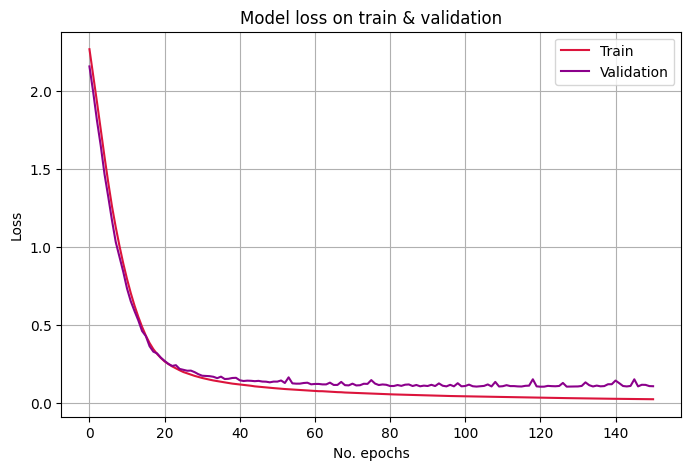

In [14]:
# Graficar loss de entrenamiento Y validación
plt.figure(figsize = (8, 5))
plt.title('Model loss on train & validation')
plt.xlabel('No. epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss_train, '#DC143C', label = 'Train')
plt.plot(epochs, loss_val, '#8B008B', label = 'Validation')
plt.grid()
plt.legend()

Accuracy Normalizado en Entrenamiento: 0.997698882314267


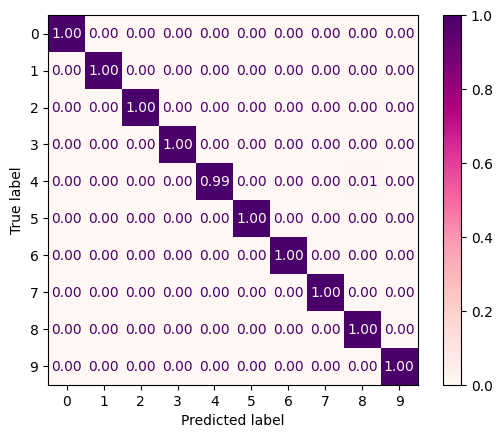

In [15]:
# Calcula las predicciones en el conjunto de entrenamiento
model.train()
all_predictions = []
all_labels = []

with torch.no_grad():
    for i, data in enumerate(dataloader_train, 0):
        inputs = data["features"].to(device)
        labels = data["labels"].to(device)
        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()
        all_predictions.extend(predictions)
        all_labels.extend(labels.cpu().numpy())

# Calcula la matriz de confusión
confusion = confusion_matrix(all_labels, all_predictions, normalize='true')

# Calcula el accuracy normalizado
accuracy = accuracy_score(all_labels, all_predictions)

cmap = plt.get_cmap('RdPu')

# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion, display_labels=np.unique(all_labels))
disp = disp.plot(cmap=cmap, values_format='.2f')

# Muestra el accuracy normalizado
print("Accuracy Normalizado en Entrenamiento:", accuracy)

# Muestra la matriz de confusión normalizada
plt.show()

Accuracy Normalizado en Validación: 0.9693486590038314


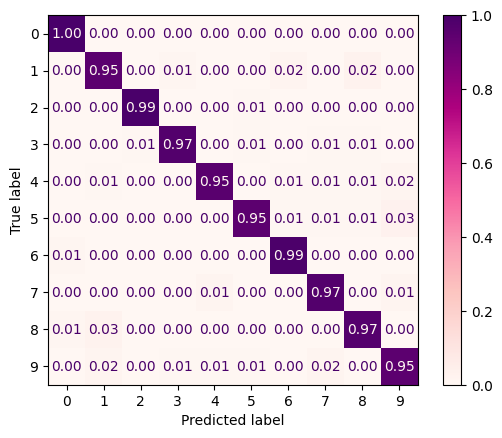

In [16]:
# Coloca el modelo en modo de evaluación
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for i, data in enumerate(dataloader_val, 0):
        inputs = data["features"].to(device)
        labels = data["labels"].to(device)
        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()
        all_predictions.extend(predictions)
        all_labels.extend(labels.cpu().numpy())

# Calcula la matriz de confusión
confusion = confusion_matrix(all_labels, all_predictions, normalize='true')

# Calcula el accuracy normalizado
accuracy = accuracy_score(all_labels, all_predictions)

cmap = plt.get_cmap('RdPu')

# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion, display_labels=np.unique(all_labels))
disp = disp.plot(cmap=cmap, values_format='.2f')

# Muestra el accuracy normalizado
print("Accuracy Normalizado en Validación:", accuracy)

# Muestra la matriz de confusión normalizada
plt.show()

# **Modelo 40 neuronas ReLU y 1000 épocas**

In [17]:
model = nn.Sequential(
          nn.Linear(64, 40),
          nn.ReLU(),
          nn.Linear(40, 10)
        )

In [18]:
device = torch.device('cuda')

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [19]:
# Establece un valor de paciencia
start = time.time()
p = 30 #Establece un valor para evitar el overfitting
best_validation_loss = float('inf')
epochs_without_improvement = 0

# Guardar resultados del loss y epocas que duró el entrenamiento
loss_train = []
loss_val = []
epochs = []

# Entrenamiento de la red por n epocas
for epoch in range(1000):
  # Guardar loss de cada batch
  loss_train_batches = []
  loss_val_batches = []

  # Entrenamiento --------------------------------------------------------------
  model.train()
  # Debemos recorrer cada batch (lote de los datos)
  for i, data in enumerate(dataloader_train, 0):
    # Procesar batch actual
    inputs = data["features"].to(device) # Características
    labels = data["labels"].to(device)   # Clases
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = model(inputs)           # Predicciones
    loss = criterion(outputs, labels) # Loss de entrenamiento
    loss.backward()                   # Backpropagation
    optimizer.step()

    # Guardamos la pérdida de entrenamiento en el batch actual
    loss_train_batches.append(loss.item())

  # Guardamos el loss de entrenamiento de la época actual
  loss_train.append(np.mean(loss_train_batches)) # Loss promedio de los batches

  # Predicción en conjunto de validación ---------------------------------------
  model.eval()
  with torch.no_grad():
    # Iteramos dataloader_val para evaluar el modelo en los datos de validación
    for i, data in enumerate(dataloader_val, 0):
      # Procesar batch actual
      inputs = data["features"].to(device) # Características
      labels = data["labels"].to(device)   # Clases

      outputs = model(inputs)              # Obtenemos predicciones

      # Guardamos la pérdida de validación en el batch actual
      loss = criterion(outputs, labels)
      loss_val_batches.append(loss.item())

  # Guardamos el Loss de validación de la época actual
  loss_val.append(np.mean(loss_val_batches)) # Loss promedio de los batches

  # Guardamos la época
  epochs.append(epoch)

  # Imprimir la pérdida de entrenamiento/validación en la época actual
  print(("Epoch: %d, train loss: %.4f, val loss: %.4f"  %(epoch, loss_train[epoch], loss_val[epoch])))

  # Calcula el error de validación y compáralo con el mejor error de validación registrado
  if loss_val[epoch] < best_validation_loss:
    # Actualiza el mejor error de validación
    best_validation_loss = loss_val[epoch]
    # Guarda el estado del modelo como un checkpoint
    torch.save(model.state_dict(), 'best_model_checkpoint.pth')
    epochs_without_improvement = 0
  else:
    # Incrementa el contador de épocas sin mejora
    epochs_without_improvement += 1

  # Comprueba si se supera la paciencia y detén el entrenamiento si es necesario
  if epochs_without_improvement >= p:
    print("Deteniendo el entrenamiento debido a falta de mejora en validación.")
    break

end = time.time()
print('Finished Training, total time %f seconds' % (end - start))

Epoch: 0, train loss: 2.1537, val loss: 1.9236
Epoch: 1, train loss: 1.7143, val loss: 1.4528
Epoch: 2, train loss: 1.2623, val loss: 1.0257
Epoch: 3, train loss: 0.8746, val loss: 0.7169
Epoch: 4, train loss: 0.6101, val loss: 0.5006
Epoch: 5, train loss: 0.4507, val loss: 0.3954
Epoch: 6, train loss: 0.3527, val loss: 0.3088
Epoch: 7, train loss: 0.2906, val loss: 0.2737
Epoch: 8, train loss: 0.2495, val loss: 0.2449
Epoch: 9, train loss: 0.2168, val loss: 0.2094
Epoch: 10, train loss: 0.1935, val loss: 0.1951
Epoch: 11, train loss: 0.1753, val loss: 0.1776
Epoch: 12, train loss: 0.1594, val loss: 0.1607
Epoch: 13, train loss: 0.1459, val loss: 0.1509
Epoch: 14, train loss: 0.1356, val loss: 0.1412
Epoch: 15, train loss: 0.1258, val loss: 0.1343
Epoch: 16, train loss: 0.1173, val loss: 0.1245
Epoch: 17, train loss: 0.1098, val loss: 0.1243
Epoch: 18, train loss: 0.1034, val loss: 0.1179
Epoch: 19, train loss: 0.0970, val loss: 0.1301
Epoch: 20, train loss: 0.0919, val loss: 0.1118
Ep

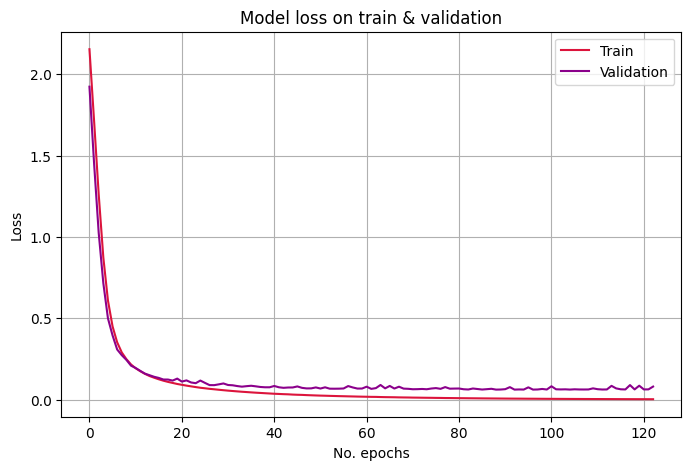

In [20]:
# Graficar loss de entrenamiento Y validación
plt.figure(figsize = (8, 5))
plt.title('Model loss on train & validation')
plt.xlabel('No. epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss_train, '#DC143C', label = 'Train')
plt.plot(epochs, loss_val, '#8B008B', label = 'Validation')
plt.grid()
plt.legend()

Accuracy Normalizado en Entrenamiento: 1.0


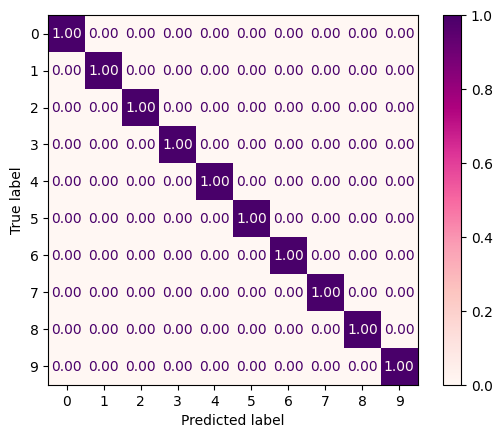

In [21]:
# Calcula las predicciones en el conjunto de entrenamiento
model.train()
all_predictions = []
all_labels = []

with torch.no_grad():
    for i, data in enumerate(dataloader_train, 0):
        inputs = data["features"].to(device)
        labels = data["labels"].to(device)
        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()
        all_predictions.extend(predictions)
        all_labels.extend(labels.cpu().numpy())

# Calcula la matriz de confusión
confusion = confusion_matrix(all_labels, all_predictions, normalize='true')

# Calcula el accuracy normalizado
accuracy = accuracy_score(all_labels, all_predictions)

cmap = plt.get_cmap('RdPu')

# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion, display_labels=np.unique(all_labels))
disp = disp.plot(cmap=cmap, values_format='.2f')

# Muestra el accuracy normalizado
print("Accuracy Normalizado en Entrenamiento:", accuracy)

# Muestra la matriz de confusión normalizada
plt.show()

Accuracy Normalizado en Validación: 0.9770114942528736


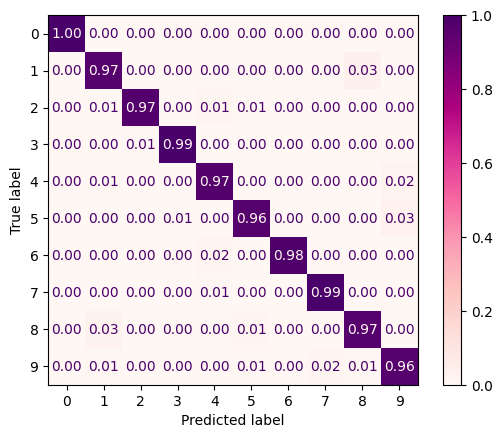

In [22]:
# Coloca el modelo en modo de evaluación
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for i, data in enumerate(dataloader_val, 0):
        inputs = data["features"].to(device)
        labels = data["labels"].to(device)
        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()
        all_predictions.extend(predictions)
        all_labels.extend(labels.cpu().numpy())

# Calcula la matriz de confusión
confusion = confusion_matrix(all_labels, all_predictions, normalize='true')

# Calcula el accuracy normalizado
accuracy = accuracy_score(all_labels, all_predictions)

cmap = plt.get_cmap('RdPu')

# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion, display_labels=np.unique(all_labels))
disp = disp.plot(cmap=cmap, values_format='.2f')

# Muestra el accuracy normalizado
print("Accuracy Normalizado en Validación:", accuracy)

# Muestra la matriz de confusión normalizada
plt.show()

# **Modelo 10 neuronas Tanh y 1000 épocas**

In [23]:
model = nn.Sequential(
          nn.Linear(64, 10),
          nn.Tanh(),
          nn.Linear(10, 10)
        )

In [24]:
device = torch.device('cuda')

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [25]:
# Establece un valor de paciencia
start = time.time()
p = 30
best_validation_loss = float('inf')
epochs_without_improvement = 0

# Guardar resultados del loss y epocas que duró el entrenamiento
loss_train = []
loss_val = []
epochs = []

# Entrenamiento de la red por n epocas
for epoch in range(1000):
  # Guardar loss de cada batch
  loss_train_batches = []
  loss_val_batches = []

  # Entrenamiento --------------------------------------------------------------
  model.train()
  # Debemos recorrer cada batch (lote de los datos)
  for i, data in enumerate(dataloader_train, 0):
    # Procesar batch actual
    inputs = data["features"].to(device) # Características
    labels = data["labels"].to(device)   # Clases
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = model(inputs)           # Predicciones
    loss = criterion(outputs, labels) # Loss de entrenamiento
    loss.backward()                   # Backpropagation
    optimizer.step()

    # Guardamos la pérdida de entrenamiento en el batch actual
    loss_train_batches.append(loss.item())

  # Guardamos el loss de entrenamiento de la época actual
  loss_train.append(np.mean(loss_train_batches)) # Loss promedio de los batches

  # Predicción en conjunto de validación ---------------------------------------
  model.eval()
  with torch.no_grad():
    # Iteramos dataloader_val para evaluar el modelo en los datos de validación
    for i, data in enumerate(dataloader_val, 0):
      # Procesar batch actual
      inputs = data["features"].to(device) # Características
      labels = data["labels"].to(device)   # Clases

      outputs = model(inputs)              # Obtenemos predicciones

      # Guardamos la pérdida de validación en el batch actual
      loss = criterion(outputs, labels)
      loss_val_batches.append(loss.item())

  # Guardamos el Loss de validación de la época actual
  loss_val.append(np.mean(loss_val_batches)) # Loss promedio de los batches

  # Guardamos la época
  epochs.append(epoch)

  # Imprimir la pérdida de entrenamiento/validación en la época actual
  print(("Epoch: %d, train loss: %.4f, val loss: %.4f"  %(epoch, loss_train[epoch], loss_val[epoch])))

  # Calcula el error de validación y compáralo con el mejor error de validación registrado
  if loss_val[epoch] < best_validation_loss:
    # Actualiza el mejor error de validación
    best_validation_loss = loss_val[epoch]
    # Guarda el estado del modelo como un checkpoint
    torch.save(model.state_dict(), 'best_model_checkpoint.pth')
    epochs_without_improvement = 0
  else:
    # Incrementa el contador de épocas sin mejora
    epochs_without_improvement += 1

  # Comprueba si se supera la paciencia y detén el entrenamiento si es necesario
  if epochs_without_improvement >= p:
    print("Deteniendo el entrenamiento debido a falta de mejora en validación.")
    break

end = time.time()
print('Finished Training, total time %f seconds' % (end - start))


Epoch: 0, train loss: 2.1835, val loss: 2.0623
Epoch: 1, train loss: 1.9690, val loss: 1.8672
Epoch: 2, train loss: 1.7924, val loss: 1.7031
Epoch: 3, train loss: 1.6366, val loss: 1.5652
Epoch: 4, train loss: 1.4992, val loss: 1.4340
Epoch: 5, train loss: 1.3725, val loss: 1.3131
Epoch: 6, train loss: 1.2556, val loss: 1.1982
Epoch: 7, train loss: 1.1499, val loss: 1.0987
Epoch: 8, train loss: 1.0519, val loss: 0.9981
Epoch: 9, train loss: 0.9625, val loss: 0.9272
Epoch: 10, train loss: 0.8820, val loss: 0.8466
Epoch: 11, train loss: 0.8086, val loss: 0.7860
Epoch: 12, train loss: 0.7433, val loss: 0.7194
Epoch: 13, train loss: 0.6850, val loss: 0.6595
Epoch: 14, train loss: 0.6343, val loss: 0.6112
Epoch: 15, train loss: 0.5896, val loss: 0.5724
Epoch: 16, train loss: 0.5494, val loss: 0.5339
Epoch: 17, train loss: 0.5154, val loss: 0.5252
Epoch: 18, train loss: 0.4848, val loss: 0.4775
Epoch: 19, train loss: 0.4571, val loss: 0.4497
Epoch: 20, train loss: 0.4332, val loss: 0.4337
Ep

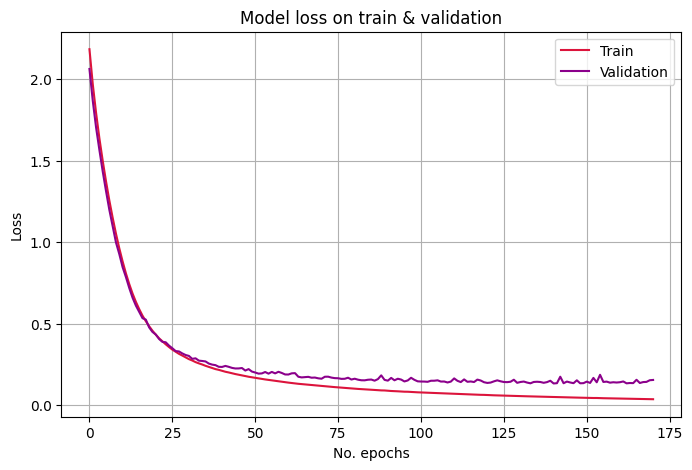

In [26]:
# Graficar loss de entrenamiento Y validación
plt.figure(figsize = (8, 5))
plt.title('Model loss on train & validation')
plt.xlabel('No. epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss_train, '#DC143C', label = 'Train')
plt.plot(epochs, loss_val, '#8B008B', label = 'Validation')
plt.grid()
plt.legend()

Accuracy Normalizado en Entrenamiento: 0.997698882314267


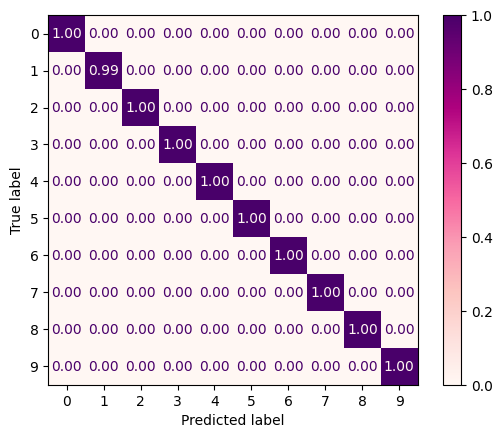

In [27]:
# Calcula las predicciones en el conjunto de entrenamiento
model.train()
all_predictions = []
all_labels = []

with torch.no_grad():
    for i, data in enumerate(dataloader_train, 0):
        inputs = data["features"].to(device)
        labels = data["labels"].to(device)
        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()
        all_predictions.extend(predictions)
        all_labels.extend(labels.cpu().numpy())

# Calcula la matriz de confusión
confusion = confusion_matrix(all_labels, all_predictions, normalize='true')

# Calcula el accuracy normalizado
accuracy = accuracy_score(all_labels, all_predictions)

cmap = plt.get_cmap('RdPu')

# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion, display_labels=np.unique(all_labels))
disp = disp.plot(cmap=cmap, values_format='.2f')

# Muestra el accuracy normalizado
print("Accuracy Normalizado en Entrenamiento:", accuracy)

# Muestra la matriz de confusión normalizada
plt.show()

Accuracy Normalizado en Validación: 0.9624521072796934


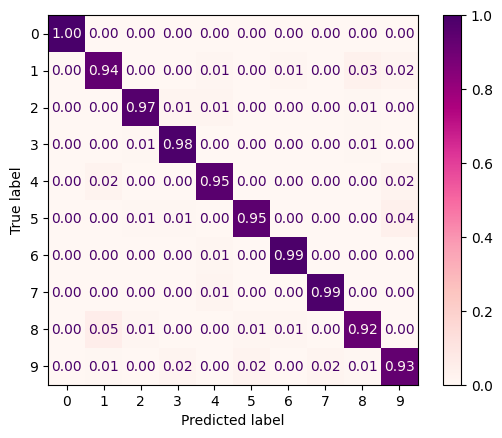

In [28]:
# Coloca el modelo en modo de evaluación
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for i, data in enumerate(dataloader_val, 0):
        inputs = data["features"].to(device)
        labels = data["labels"].to(device)
        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()
        all_predictions.extend(predictions)
        all_labels.extend(labels.cpu().numpy())

# Calcula la matriz de confusión
confusion = confusion_matrix(all_labels, all_predictions, normalize='true')

# Calcula el accuracy normalizado
accuracy = accuracy_score(all_labels, all_predictions)

cmap = plt.get_cmap('RdPu')

# Visualiza la matriz de confusión con el nuevo cmap
disp = ConfusionMatrixDisplay(confusion, display_labels=np.unique(all_labels))
disp = disp.plot(cmap=cmap, values_format='.2f')

# Muestra el accuracy normalizado
print("Accuracy Normalizado en Validación:", accuracy)

# Muestra la matriz de confusión normalizada
plt.show()

# **Modelo 40 neuronas Tanh y 1000 épocas**

In [29]:
model = nn.Sequential(
          nn.Linear(64, 40),
          nn.Tanh(),
          nn.Linear(40, 10)
        )

In [30]:
device = torch.device('cuda')

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [31]:
# Establece un valor de paciencia
start = time.time()
p = 30
best_validation_loss = float('inf')
epochs_without_improvement = 0

# Guardar resultados del loss y epocas que duró el entrenamiento
loss_train = []
loss_val = []
epochs = []

# Entrenamiento de la red por n epocas
for epoch in range(1000):
  # Guardar loss de cada batch
  loss_train_batches = []
  loss_val_batches = []

  # Entrenamiento --------------------------------------------------------------
  model.train()
  # Debemos recorrer cada batch (lote de los datos)
  for i, data in enumerate(dataloader_train, 0):
    # Procesar batch actual
    inputs = data["features"].to(device) # Características
    labels = data["labels"].to(device)   # Clases
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = model(inputs)           # Predicciones
    loss = criterion(outputs, labels) # Loss de entrenamiento
    loss.backward()                   # Backpropagation
    optimizer.step()

    # Guardamos la pérdida de entrenamiento en el batch actual
    loss_train_batches.append(loss.item())

  # Guardamos el loss de entrenamiento de la época actual
  loss_train.append(np.mean(loss_train_batches)) # Loss promedio de los batches

  # Predicción en conjunto de validación ---------------------------------------
  model.eval()
  with torch.no_grad():
    # Iteramos dataloader_val para evaluar el modelo en los datos de validación
    for i, data in enumerate(dataloader_val, 0):
      # Procesar batch actual
      inputs = data["features"].to(device) # Características
      labels = data["labels"].to(device)   # Clases

      outputs = model(inputs)              # Obtenemos predicciones

      # Guardamos la pérdida de validación en el batch actual
      loss = criterion(outputs, labels)
      loss_val_batches.append(loss.item())

  # Guardamos el Loss de validación de la época actual
  loss_val.append(np.mean(loss_val_batches)) # Loss promedio de los batches

  # Guardamos la época
  epochs.append(epoch)

  # Imprimir la pérdida de entrenamiento/validación en la época actual
  print(("Epoch: %d, train loss: %.4f, val loss: %.4f"  %(epoch, loss_train[epoch], loss_val[epoch])))

  # Calcula el error de validación y compáralo con el mejor error de validación registrado
  if loss_val[epoch] < best_validation_loss:
    # Actualiza el mejor error de validación
    best_validation_loss = loss_val[epoch]
    # Guarda el estado del modelo como un checkpoint
    torch.save(model.state_dict(), 'best_model_checkpoint.pth')
    epochs_without_improvement = 0
  else:
    # Incrementa el contador de épocas sin mejora
    epochs_without_improvement += 1

  # Comprueba si se supera la paciencia y detén el entrenamiento si es necesario
  if epochs_without_improvement >= p:
    print("Deteniendo el entrenamiento debido a falta de mejora en validación.")
    break

end = time.time()
print('Finished Training, total time %f seconds' % (end - start))


Epoch: 0, train loss: 2.0337, val loss: 1.7207
Epoch: 1, train loss: 1.4943, val loss: 1.2650
Epoch: 2, train loss: 1.1015, val loss: 0.9313
Epoch: 3, train loss: 0.8228, val loss: 0.7132
Epoch: 4, train loss: 0.6328, val loss: 0.5492
Epoch: 5, train loss: 0.5037, val loss: 0.4499
Epoch: 6, train loss: 0.4153, val loss: 0.3815
Epoch: 7, train loss: 0.3520, val loss: 0.3287
Epoch: 8, train loss: 0.3051, val loss: 0.2916
Epoch: 9, train loss: 0.2691, val loss: 0.2601
Epoch: 10, train loss: 0.2411, val loss: 0.2273
Epoch: 11, train loss: 0.2193, val loss: 0.2188
Epoch: 12, train loss: 0.2011, val loss: 0.2080
Epoch: 13, train loss: 0.1855, val loss: 0.1861
Epoch: 14, train loss: 0.1727, val loss: 0.1771
Epoch: 15, train loss: 0.1613, val loss: 0.1669
Epoch: 16, train loss: 0.1512, val loss: 0.1556
Epoch: 17, train loss: 0.1424, val loss: 0.1519
Epoch: 18, train loss: 0.1343, val loss: 0.1548
Epoch: 19, train loss: 0.1278, val loss: 0.1617
Epoch: 20, train loss: 0.1214, val loss: 0.1354
Ep

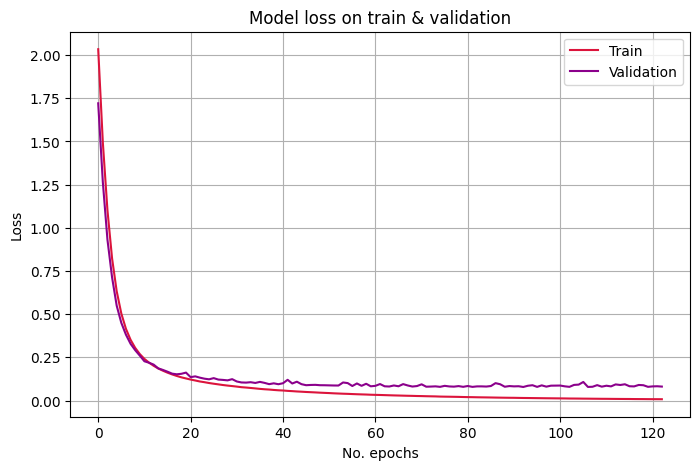

In [32]:
# Graficar loss de entrenamiento Y validación
plt.figure(figsize = (8, 5))
plt.title('Model loss on train & validation')
plt.xlabel('No. epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss_train, '#DC143C', label = 'Train')
plt.plot(epochs, loss_val, '#8B008B', label = 'Validation')
plt.grid()
plt.legend()

Accuracy Normalizado en Entrenamiento: 1.0


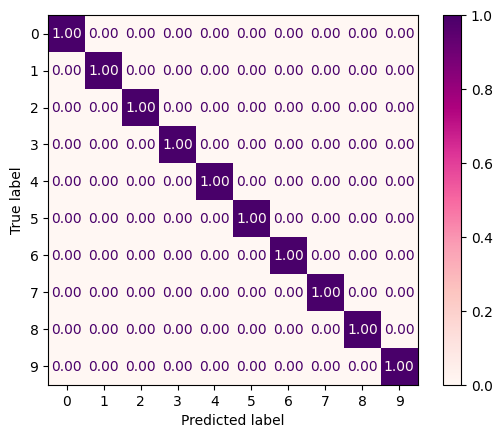

In [33]:
# Calcula las predicciones en el conjunto de entrenamiento
model.train()
all_predictions = []
all_labels = []

with torch.no_grad():
    for i, data in enumerate(dataloader_train, 0):
        inputs = data["features"].to(device)
        labels = data["labels"].to(device)
        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()
        all_predictions.extend(predictions)
        all_labels.extend(labels.cpu().numpy())

# Calcula la matriz de confusión
confusion = confusion_matrix(all_labels, all_predictions, normalize='true')

# Calcula el accuracy normalizado
accuracy = accuracy_score(all_labels, all_predictions)

cmap = plt.get_cmap('RdPu')

# Visualiza la matriz de confusión con el nuevo cmap
disp = ConfusionMatrixDisplay(confusion, display_labels=np.unique(all_labels))
disp = disp.plot(cmap=cmap, values_format='.2f')

# Muestra el accuracy normalizado
print("Accuracy Normalizado en Entrenamiento:", accuracy)

# Muestra la matriz de confusión normalizada
plt.show()

Accuracy Normalizado en Validación: 0.9747126436781609


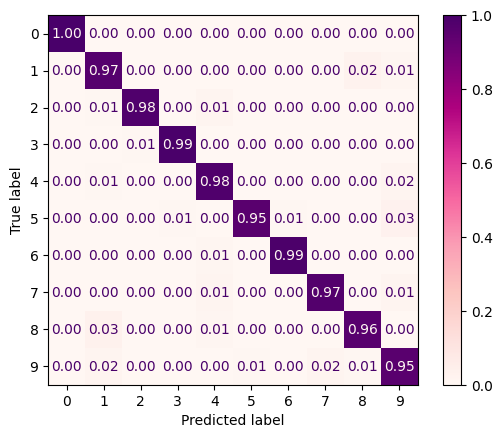

In [34]:
# Coloca el modelo en modo de evaluación
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for i, data in enumerate(dataloader_val, 0):
        inputs = data["features"].to(device)
        labels = data["labels"].to(device)
        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()
        all_predictions.extend(predictions)
        all_labels.extend(labels.cpu().numpy())

# Calcula la matriz de confusión
confusion = confusion_matrix(all_labels, all_predictions, normalize='true')

# Calcula el accuracy normalizado
accuracy = accuracy_score(all_labels, all_predictions)

cmap = plt.get_cmap('RdPu')

# Visualiza la matriz de confusión con el nuevo cmap
disp = ConfusionMatrixDisplay(confusion, display_labels=np.unique(all_labels))
disp = disp.plot(cmap=cmap, values_format='.2f')

# Muestra el accuracy normalizado
print("Accuracy Normalizado en Validación:", accuracy)

# Muestra la matriz de confusión normalizada
plt.show()

# **2 capas ocultas con 10 neuronas cada una, ReLU y 1000 épocas**

In [35]:
model = nn.Sequential(
          nn.Linear(64, 10),
          nn.ReLU(),
          nn.Linear(10, 10),
          nn.ReLU(),
          nn.Linear(10, 10)
        )

In [36]:
device = torch.device('cuda')

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [37]:
# Establece un valor de paciencia
start = time.time()
p = 30
best_validation_loss = float('inf')
epochs_without_improvement = 0

# Guardar resultados del loss y epocas que duró el entrenamiento
loss_train = []
loss_val = []
epochs = []

# Entrenamiento de la red por n epocas
for epoch in range(1000):
  # Guardar loss de cada batch
  loss_train_batches = []
  loss_val_batches = []

  # Entrenamiento --------------------------------------------------------------
  model.train()
  # Debemos recorrer cada batch (lote de los datos)
  for i, data in enumerate(dataloader_train, 0):
    # Procesar batch actual
    inputs = data["features"].to(device) # Características
    labels = data["labels"].to(device)   # Clases
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = model(inputs)           # Predicciones
    loss = criterion(outputs, labels) # Loss de entrenamiento
    loss.backward()                   # Backpropagation
    optimizer.step()

    # Guardamos la pérdida de entrenamiento en el batch actual
    loss_train_batches.append(loss.item())

  # Guardamos el loss de entrenamiento de la época actual
  loss_train.append(np.mean(loss_train_batches)) # Loss promedio de los batches

  # Predicción en conjunto de validación ---------------------------------------
  model.eval()
  with torch.no_grad():
    # Iteramos dataloader_val para evaluar el modelo en los datos de validación
    for i, data in enumerate(dataloader_val, 0):
      # Procesar batch actual
      inputs = data["features"].to(device) # Características
      labels = data["labels"].to(device)   # Clases

      outputs = model(inputs)              # Obtenemos predicciones

      # Guardamos la pérdida de validación en el batch actual
      loss = criterion(outputs, labels)
      loss_val_batches.append(loss.item())

  # Guardamos el Loss de validación de la época actual
  loss_val.append(np.mean(loss_val_batches)) # Loss promedio de los batches

  # Guardamos la época
  epochs.append(epoch)

  # Imprimir la pérdida de entrenamiento/validación en la época actual
  print(("Epoch: %d, train loss: %.4f, val loss: %.4f"  %(epoch, loss_train[epoch], loss_val[epoch])))

  # Calcula el error de validación y compáralo con el mejor error de validación registrado
  if loss_val[epoch] < best_validation_loss:
    # Actualiza el mejor error de validación
    best_validation_loss = loss_val[epoch]
    # Guarda el estado del modelo como un checkpoint
    torch.save(model.state_dict(), 'best_model_checkpoint.pth')
    epochs_without_improvement = 0
  else:
    # Incrementa el contador de épocas sin mejora
    epochs_without_improvement += 1

  # Comprueba si se supera la paciencia y detén el entrenamiento si es necesario
  if epochs_without_improvement >= p:
    print("Deteniendo el entrenamiento debido a falta de mejora en validación.")
    break

end = time.time()
print('Finished Training, total time %f seconds' % (end - start))

Epoch: 0, train loss: 2.2810, val loss: 2.2391
Epoch: 1, train loss: 2.1824, val loss: 2.0945
Epoch: 2, train loss: 2.0256, val loss: 1.9192
Epoch: 3, train loss: 1.8420, val loss: 1.7513
Epoch: 4, train loss: 1.6491, val loss: 1.5423
Epoch: 5, train loss: 1.4528, val loss: 1.3528
Epoch: 6, train loss: 1.2768, val loss: 1.1930
Epoch: 7, train loss: 1.1197, val loss: 1.0373
Epoch: 8, train loss: 0.9725, val loss: 0.9084
Epoch: 9, train loss: 0.8455, val loss: 0.8081
Epoch: 10, train loss: 0.7390, val loss: 0.7104
Epoch: 11, train loss: 0.6535, val loss: 0.6363
Epoch: 12, train loss: 0.5847, val loss: 0.5498
Epoch: 13, train loss: 0.5277, val loss: 0.5087
Epoch: 14, train loss: 0.4746, val loss: 0.4597
Epoch: 15, train loss: 0.4293, val loss: 0.4132
Epoch: 16, train loss: 0.3878, val loss: 0.3658
Epoch: 17, train loss: 0.3487, val loss: 0.3259
Epoch: 18, train loss: 0.3147, val loss: 0.2899
Epoch: 19, train loss: 0.2846, val loss: 0.2790
Epoch: 20, train loss: 0.2594, val loss: 0.2565
Ep

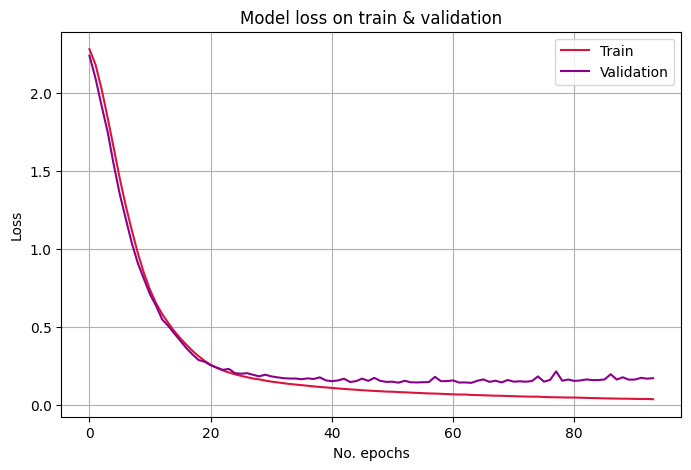

In [38]:
# Graficar loss de entrenamiento Y validación
plt.figure(figsize = (8, 5))
plt.title('Model loss on train & validation')
plt.xlabel('No. epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss_train, '#DC143C', label = 'Train')
plt.plot(epochs, loss_val, '#8B008B', label = 'Validation')
plt.grid()
plt.legend()

Accuracy Normalizado en Entrenamiento: 0.9904667981591059


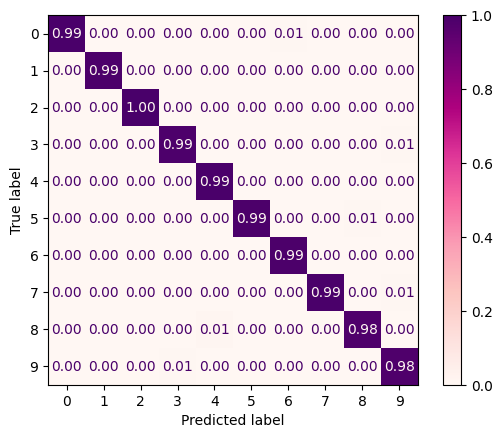

In [39]:
# Calcula las predicciones en el conjunto de entrenamiento
model.train()
all_predictions = []
all_labels = []

with torch.no_grad():
    for i, data in enumerate(dataloader_train, 0):
        inputs = data["features"].to(device)
        labels = data["labels"].to(device)
        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()
        all_predictions.extend(predictions)
        all_labels.extend(labels.cpu().numpy())

# Calcula la matriz de confusión
confusion = confusion_matrix(all_labels, all_predictions, normalize='true')

# Calcula el accuracy normalizado
accuracy = accuracy_score(all_labels, all_predictions)

cmap = plt.get_cmap('RdPu')

# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion, display_labels=np.unique(all_labels))
disp = disp.plot(cmap=cmap, values_format='.2f')

# Muestra el accuracy normalizado
print("Accuracy Normalizado en Entrenamiento:", accuracy)

# Muestra la matriz de confusión normalizada
plt.show()

Accuracy Normalizado en Validación: 0.9555555555555556


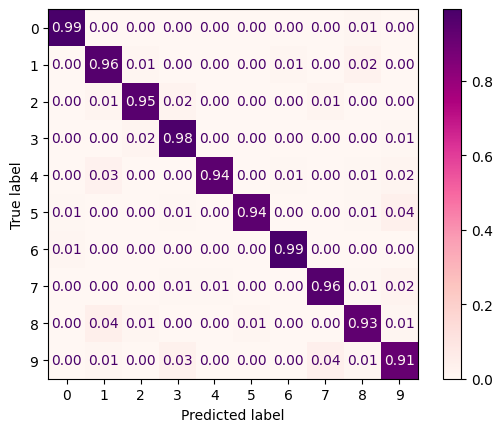

In [40]:
# Coloca el modelo en modo de evaluación
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for i, data in enumerate(dataloader_val, 0):
        inputs = data["features"].to(device)
        labels = data["labels"].to(device)
        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()
        all_predictions.extend(predictions)
        all_labels.extend(labels.cpu().numpy())

# Calcula la matriz de confusión
confusion = confusion_matrix(all_labels, all_predictions, normalize='true')

# Calcula el accuracy normalizado
accuracy = accuracy_score(all_labels, all_predictions)

cmap = plt.get_cmap('RdPu')

# Visualiza la matriz de confusión con el nuevo cmap
disp = ConfusionMatrixDisplay(confusion, display_labels=np.unique(all_labels))
disp = disp.plot(cmap=cmap, values_format='.2f')

# Muestra el accuracy normalizado
print("Accuracy Normalizado en Validación:", accuracy)

# Muestra la matriz de confusión normalizada
plt.show()

# **2 capas ocultas con 40 neuronas cada una, ReLU y 1000 épocas**

In [41]:
model = nn.Sequential(
          nn.Linear(64, 40),
          nn.ReLU(),
          nn.Linear(40, 40),
          nn.ReLU(),
          nn.Linear(40, 10)
        )

In [42]:
device = torch.device('cuda')

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [43]:
# Establece un valor de paciencia
start = time.time()
p = 30
best_validation_loss = float('inf')
epochs_without_improvement = 0

# Guardar resultados del loss y epocas que duró el entrenamiento
loss_train = []
loss_val = []
epochs = []

# Entrenamiento de la red por n epocas
for epoch in range(1000):
  # Guardar loss de cada batch
  loss_train_batches = []
  loss_val_batches = []

  # Entrenamiento --------------------------------------------------------------
  model.train()
  # Debemos recorrer cada batch (lote de los datos)
  for i, data in enumerate(dataloader_train, 0):
    # Procesar batch actual
    inputs = data["features"].to(device) # Características
    labels = data["labels"].to(device)   # Clases
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = model(inputs)           # Predicciones
    loss = criterion(outputs, labels) # Loss de entrenamiento
    loss.backward()                   # Backpropagation
    optimizer.step()

    # Guardamos la pérdida de entrenamiento en el batch actual
    loss_train_batches.append(loss.item())

  # Guardamos el loss de entrenamiento de la época actual
  loss_train.append(np.mean(loss_train_batches)) # Loss promedio de los batches

  # Predicción en conjunto de validación ---------------------------------------
  model.eval()
  with torch.no_grad():
    # Iteramos dataloader_val para evaluar el modelo en los datos de validación
    for i, data in enumerate(dataloader_val, 0):
      # Procesar batch actual
      inputs = data["features"].to(device) # Características
      labels = data["labels"].to(device)   # Clases

      outputs = model(inputs)              # Obtenemos predicciones

      # Guardamos la pérdida de validación en el batch actual
      loss = criterion(outputs, labels)
      loss_val_batches.append(loss.item())

  # Guardamos el Loss de validación de la época actual
  loss_val.append(np.mean(loss_val_batches)) # Loss promedio de los batches

  # Guardamos la época
  epochs.append(epoch)

  # Imprimir la pérdida de entrenamiento/validación en la época actual
  print(("Epoch: %d, train loss: %.4f, val loss: %.4f"  %(epoch, loss_train[epoch], loss_val[epoch])))

  # Calcula el error de validación y compáralo con el mejor error de validación registrado
  if loss_val[epoch] < best_validation_loss:
    # Actualiza el mejor error de validación
    best_validation_loss = loss_val[epoch]
    # Guarda el estado del modelo como un checkpoint
    torch.save(model.state_dict(), 'best_model_checkpoint.pth')
    epochs_without_improvement = 0
  else:
    # Incrementa el contador de épocas sin mejora
    epochs_without_improvement += 1

  # Comprueba si se supera la paciencia y detén el entrenamiento si es necesario
  if epochs_without_improvement >= p:
    print("Deteniendo el entrenamiento debido a falta de mejora en validación.")
    break

end = time.time()
print('Finished Training, total time %f seconds' % (end - start))

Epoch: 0, train loss: 2.2196, val loss: 2.0963
Epoch: 1, train loss: 1.9063, val loss: 1.6198
Epoch: 2, train loss: 1.2684, val loss: 0.8864
Epoch: 3, train loss: 0.6465, val loss: 0.4468
Epoch: 4, train loss: 0.3609, val loss: 0.2845
Epoch: 5, train loss: 0.2526, val loss: 0.2269
Epoch: 6, train loss: 0.1997, val loss: 0.1837
Epoch: 7, train loss: 0.1643, val loss: 0.1683
Epoch: 8, train loss: 0.1397, val loss: 0.1413
Epoch: 9, train loss: 0.1225, val loss: 0.1315
Epoch: 10, train loss: 0.1081, val loss: 0.1226
Epoch: 11, train loss: 0.0966, val loss: 0.1180
Epoch: 12, train loss: 0.0858, val loss: 0.1102
Epoch: 13, train loss: 0.0770, val loss: 0.1218
Epoch: 14, train loss: 0.0705, val loss: 0.0999
Epoch: 15, train loss: 0.0648, val loss: 0.0927
Epoch: 16, train loss: 0.0586, val loss: 0.1005
Epoch: 17, train loss: 0.0531, val loss: 0.1069
Epoch: 18, train loss: 0.0487, val loss: 0.0952
Epoch: 19, train loss: 0.0449, val loss: 0.0849
Epoch: 20, train loss: 0.0416, val loss: 0.0875
Ep

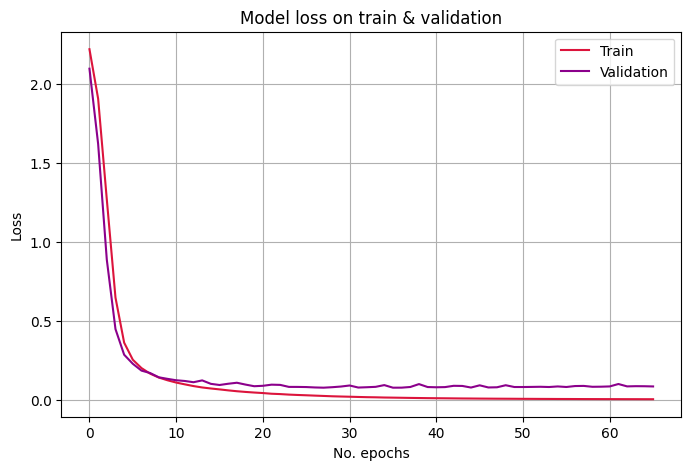

In [44]:
# Graficar loss de entrenamiento Y validación
plt.figure(figsize = (8, 5))
plt.title('Model loss on train & validation')
plt.xlabel('No. epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss_train, '#DC143C', label = 'Train')
plt.plot(epochs, loss_val, '#8B008B', label = 'Validation')
plt.grid()
plt.legend()

Accuracy Normalizado en Entrenamiento: 1.0


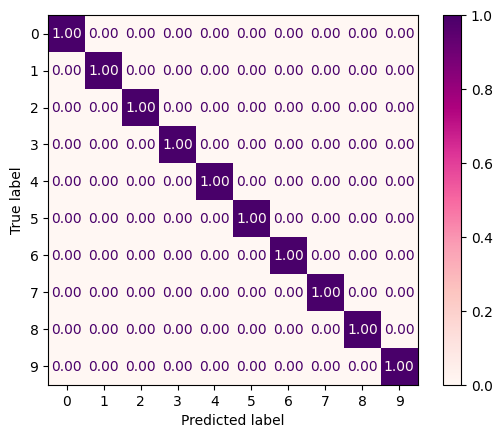

In [45]:
# Calcula las predicciones en el conjunto de entrenamiento
model.train()
all_predictions = []
all_labels = []

with torch.no_grad():
    for i, data in enumerate(dataloader_train, 0):
        inputs = data["features"].to(device)
        labels = data["labels"].to(device)
        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()
        all_predictions.extend(predictions)
        all_labels.extend(labels.cpu().numpy())

# Calcula la matriz de confusión
confusion = confusion_matrix(all_labels, all_predictions, normalize='true')

# Calcula el accuracy normalizado
accuracy = accuracy_score(all_labels, all_predictions)

cmap = plt.get_cmap('RdPu')

# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion, display_labels=np.unique(all_labels))
disp = disp.plot(cmap=cmap, values_format='.2f')

# Muestra el accuracy normalizado
print("Accuracy Normalizado en Entrenamiento:", accuracy)

# Muestra la matriz de confusión normalizada
plt.show()

Accuracy Normalizado en Validación: 0.9762452107279693


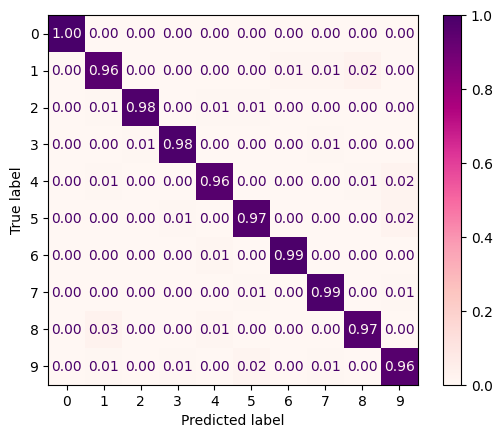

In [46]:
# Coloca el modelo en modo de evaluación
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for i, data in enumerate(dataloader_val, 0):
        inputs = data["features"].to(device)
        labels = data["labels"].to(device)
        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()
        all_predictions.extend(predictions)
        all_labels.extend(labels.cpu().numpy())

# Calcula la matriz de confusión
confusion = confusion_matrix(all_labels, all_predictions, normalize='true')

# Calcula el accuracy normalizado
accuracy = accuracy_score(all_labels, all_predictions)

cmap = plt.get_cmap('RdPu')

# Visualiza la matriz de confusión
disp = ConfusionMatrixDisplay(confusion, display_labels=np.unique(all_labels))
disp = disp.plot(cmap=cmap, values_format='.2f')

# Muestra el accuracy normalizado
print("Accuracy Normalizado en Validación:", accuracy)

# Muestra la matriz de confusión normalizada
plt.show()


# **Parte 3**

Matriz de Confusión Normalizada:
[[ 0  0  1 12  0 24 93  0  0  0]
 [ 0  0  0 94  0  7 26  1  2  0]
 [ 0  0  1 95  0  4 17  2  0  0]
 [ 0  0  1 22  1 18 78  8  1  0]
 [ 0  0  3 36  0  3 69 12  3  3]
 [ 0  1  5 48  4 34 28  0  2  6]
 [ 0  0  1 12  0 70 39  1  0  0]
 [ 0  0  0 21  1  7 93  3  0  1]
 [ 0  0  0 50  0 63 23  0  2  0]
 [ 0  0  0 46  0 24 33 14  3  0]]
Accuracy Normalizado: 0.07940251572327044


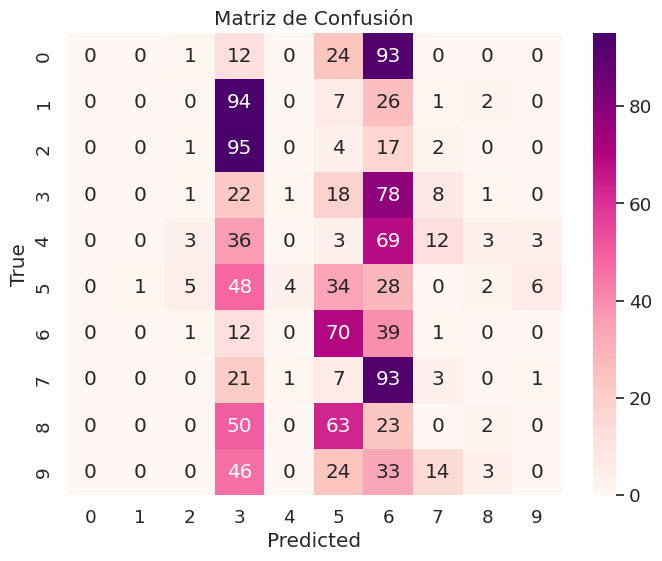

In [47]:
import seaborn as sns
model = nn.Sequential(
    nn.Linear(64, 40),
    nn.ReLU(),
    nn.Linear(40, 10)
)

model.to(device)

model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for data in dataloader_test:
        inputs = data["features"].to(device)
        labels = data["labels"].to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

confusion = confusion_matrix(true_labels, predictions)

accuracy = (np.array(true_labels) == np.array(predictions)).mean()

print("Matriz de Confusión Normalizada:")
print(confusion)
print("Accuracy Normalizado:", accuracy)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

class_labels = list(range(10))

cmap = sns.color_palette("RdPu", as_cmap=True)

sns.heatmap(confusion, annot=True, fmt="d", cmap=cmap, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')

plt.show()